In [1]:
# Dated: 8 Aug 2023, Aditya Asopa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
power_reading_path = "polygon_24x24_power_reading.csv"
power_df = pd.read_csv(power_reading_path, delimiter='\t')

In [3]:
# add another column to power_df dataframe with the coord of the spot
# coord is equal to 24*x + y
# x and y are the coordinates of the spot in the grid
# x is the row number and y is the column number
# the grid is 24x24

# add column to dataframe with the coord of the spot
power_df['coord'] = power_df['y']*24 + power_df['x']

In [4]:
observed_power = {
48:	58.6,
49:	60.3,
47:	60.8,
46:	60.1,
50:	60.3,
55:	171.5,
52:	167.8,
53:	167.9,
'all':	503,
'full': 6730
}

patterns = {
48: [197, 255, 347, 401, 439],
49: [201, 293, 351, 355, 443],
47: [205, 251, 297, 389, 447],
46: [209, 247, 259, 301, 393],
50: [251, 305, 343, 397, 451],
55: [105, 151, 163, 201, 213, 247, 259, 293, 297, 389, 397, 435, 489, 493, 501],
52: [101, 109, 117, 147, 155, 197, 305, 309, 339, 343, 351, 401, 451, 485, 497],
53: [151, 163, 197, 201, 209, 213, 259, 301, 339, 347, 393, 401, 435, 439, 489]
}



In [5]:
# make a 2-D array of the power readings
power = np.zeros((24, 24))
# iter over power_df rows
for index, row in power_df.iterrows():
    # get the x, y, and power values
    x = int(row['x'])
    y = int(row['y'])
    p = row['power']
    # set the power value in the array
    power[x-1, y-1] = p
        

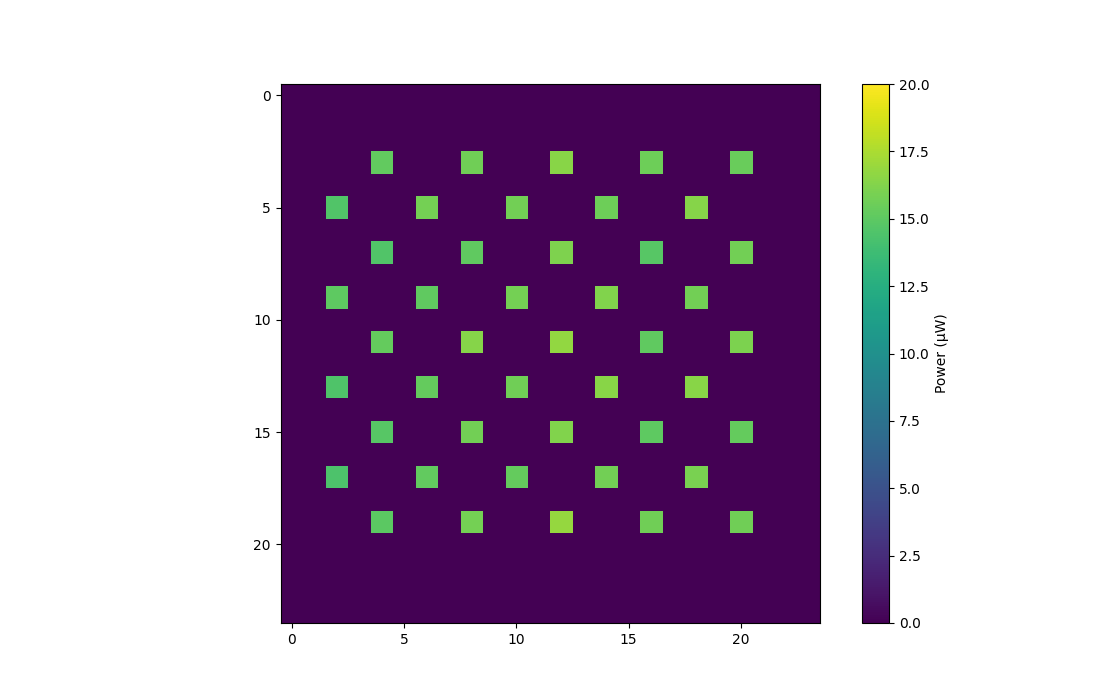

In [6]:
# make a heatmap from power array using matplotlib, cmap='viridis' and vmin=0, vmax=20
fig, ax = plt.subplots(figsize=(11,7))
ax = ax.imshow(power.T, cmap='viridis', vmin=0, vmax=20)

# add a colorbar
cbar = fig.colorbar(ax)
#add colourbar label Power(uW)
cbar.set_label('Power (µW)')



### plot a histogram of power column of the power_df

Text(0.5, 0, 'Power (µW)')

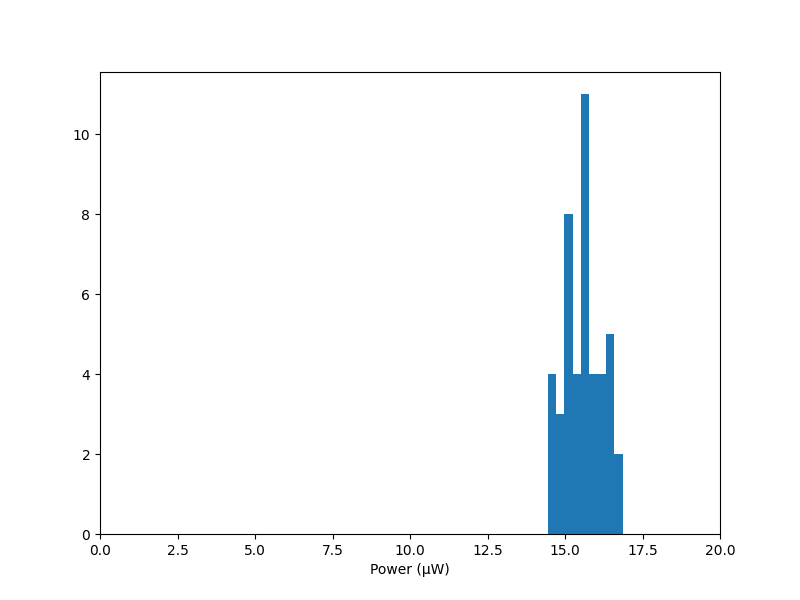

In [7]:
fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.hist(power_df['power'], bins=9)
# xlim
ax2.set_xlim(0, 20)
# xlabel
ax2.set_xlabel('Power (µW)')

### Power summation
When single spots are combined the resultant power is lesser than the sum of the powers of individual spots

Text(0.5, 1.0, 'Expected vs. Observed Power')

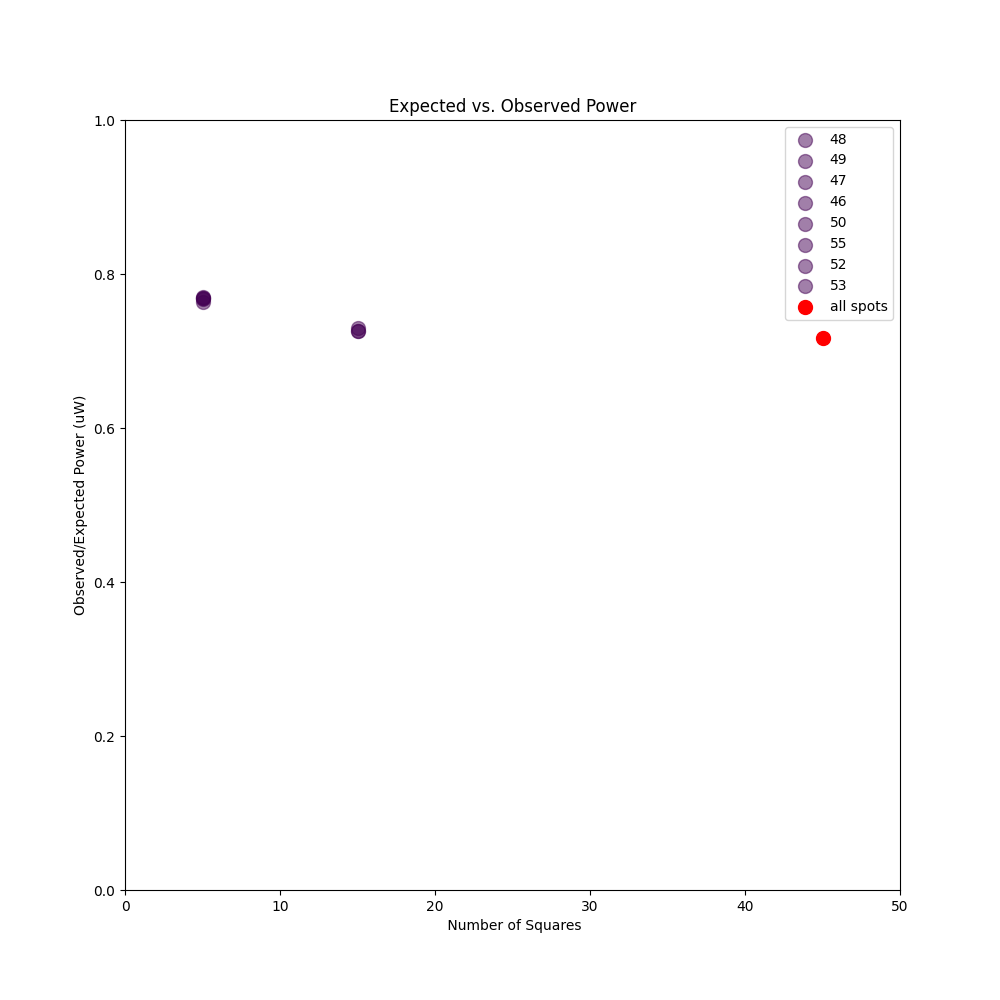

In [9]:
fig3, ax3 = plt.subplots(figsize=(10, 10))

for k,v in patterns.items():
    pattern = k
    coords = v
    numSq = len(coords)
    exp = 0 # expected power
    for c in coords:
        
        # find the coordinate in the coord column of the dataframe power_df
        exp += power_df.loc[power_df['coord'] == c]['power'].values[0]
        # print(k,v,numSq,exp)
    # print('pattern:', k, '\n', 'coords:', v, '\n', 'expected power:', exp, '\n', 'observed power:', observed_power[pattern], '\n')
    # get observed power for the pattern number
    obs = observed_power[pattern]
    # print('pattern:', k, '\n', 'coords:', v, '\n', 'expected power:', exp, '\n', 'observed power:', obs, '\n')
    # plot the expected power vs. observed power as scatter on the fig, color by number of squares, with colormap blue-green
    ax3.scatter(numSq, obs/exp, c=numSq, label=k, cmap='viridis', s=100, alpha=0.5)

# add the whole column of power to the dataframe
all_spots_power_expected = power_df['power'].sum()
all_spots_power_observed = observed_power['all']
# add all_spots expected vs observed to the scatter plot
ax3.scatter(45, all_spots_power_observed/all_spots_power_expected, c='red', label='all spots', s=100, alpha=1)

'''full frame not added to the plot as the measurement was taken after the configuration was changed
# add the whole column of power to the dataframe
full_frame_power_expected = power_df['power'].sum()*576/45
full_frame_power_observed = observed_power['full']
# add all_spots expected vs observed to the scatter plot
ax3.scatter(60, full_frame_power_observed/full_frame_power_expected, c='green', label='all spots', s=100, alpha=1)
'''

# set x and y limits
ax3.set_xlim(0, 50)
ax3.set_ylim(0, 1.0)

# set x and y labels
ax3.set_ylabel('Observed/Expected Power (uW)')
ax3.set_xlabel(' Number of Squares')

# show legend
ax3.legend()

# plt a diagonal line
# ax3.plot([0, 300], [0, 300], color='black', linestyle='--')

# set title of the figure


ax3.set_title('Expected vs. Observed Power')

### Full frame power vs intensity

Text(0, 0.5, 'Power (mW)')

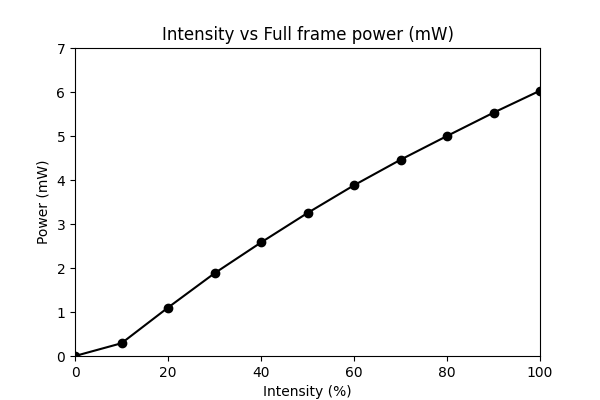

In [10]:
full_frame_intensity = np.linspace(0, 100, 11)
full_frame_power = np.array([0.7, 0.99, 1.8, 2.58, 3.28, 3.95, 4.58, 5.16, 5.7, 6.23, 6.73])
#offset
full_frame_power = full_frame_power - full_frame_power[0]

fig4, ax4 = plt.subplots(figsize=(6,4))
ax4.set_title('Intensity vs Full frame power (mW)')


ax4.plot(full_frame_intensity, full_frame_power, '-o', color='black')
# set equal x and y limits
ax4.set_xlim(0, 100)
ax4.set_ylim(0, 7)
# set labels
ax4.set_xlabel('Intensity (%)')
ax4.set_ylabel('Power (mW)')

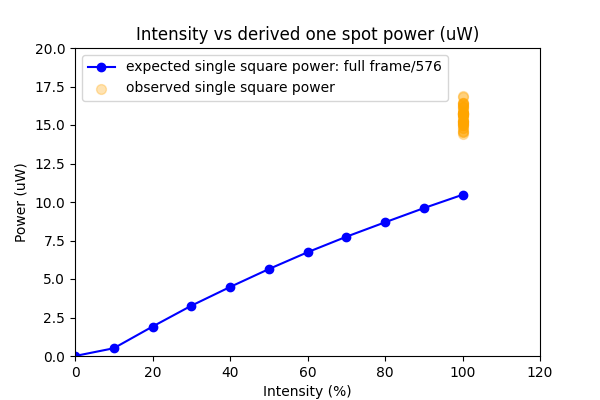

In [11]:
intensity = np.linspace(0, 100, 11)
derived_one_spot_power = full_frame_power*1000/576

fig5, ax5 = plt.subplots(figsize=(6,4))
ax5.set_title('Intensity vs derived one spot power (uW)')


ax5.plot(full_frame_intensity, derived_one_spot_power, '-o', color='blue', label='expected single square power: full frame/576')
# set equal x and y limits
ax5.set_xlim(0, 120)
ax5.set_ylim(0, 20)
# set labels
ax5.set_xlabel('Intensity (%)')
ax5.set_ylabel('Power (uW)')

obs_powers = power_df['power'].to_list()
intensities = np.linspace(100,100,45)
ax5.scatter(intensities, obs_powers, c='orange', s=50, alpha=0.3, label='observed single square power')

ax5.legend()